In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc
from sklearn import metrics

from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# read the dataset
data = pd.read_csv("clean_hotel_bookings.csv", index_col='Unnamed: 0')

/Users/moniquekong/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 58 columns):
hotel                                    119390 non-null int64
is_canceled                              119390 non-null int64
is_repeated_guest                        119390 non-null int64
reserved_room_type                       119390 non-null object
assigned_room_type                       119390 non-null object
country_is_FRA                           119390 non-null int64
country_is_DEU                           119390 non-null int64
country_is_other                         119390 non-null int64
reserved_assigned_room_type_match        119390 non-null int64
fall                                     119390 non-null int64
spring                                   119390 non-null int64
summer                                   119390 non-null int64
winter                                   119390 non-null int64
distribution_channel_Corporate           119390 non-null int64
distr

In [4]:
data['is_canceled'].value_counts(1)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

Noted that if we use majority-class method, the accuracy will be about 0.63. Therefore, the implemented method should be better than this. 

In [5]:
features = ['hotel',
            'is_repeated_guest',
#             'reserved_room_type',
#             'assigned_room_type',
            'reserved_assigned_room_type_match',
            'country_is_FRA',
            'country_is_DEU',
            'country_is_other',
            'spring',
            'summer',
            'fall',
            'winter',
            'distribution_channel_Corporate',
            'distribution_channel_Direct',
            'distribution_channel_GDS',
            'distribution_channel_TA/TO',
            'distribution_channel_Undefined',
            'market_segment_Aviation',
            'market_segment_Complementary',
            'market_segment_Corporate',
            'market_segment_Direct',
            'market_segment_Groups',
            'market_segment_Offline TA/TO',
            'market_segment_Online TA',
            'market_segment_Undefined',
            'meal_BB',
            'meal_FB',
            'meal_HB',
            'meal_SC',
            'meal_Undefined',
            'deposit_type_No Deposit',
            'deposit_type_Non Refund',
            'customer_type_Contract',
            'customer_type_Group',
            'customer_type_Transient',
            'customer_type_Transient-Party',
            'agent_14',
            'agent_7',
            'agent_is_other',
            'log_lead_minmax',
#             'cut_previous_cancellations',
#             'cut_previous_bookings_not_canceled',
#             'cut_booking_changes',
            "previous_cancellations_minmax",
            "previous_bookings_not_canceled_minmax",
            "booking_changes_minmax",
            'stays_in_weekend_nights_minmax',
            'stays_in_week_nights_minmax',
            'stays_in_total_nights_minmax',
            'adults_minmax',
            'children_minmax',
            'babies_minmax',
            'days_in_waiting_list_minmax',
            'adr_minmax',
            'required_car_parking_spaces_minmax',
            'total_of_special_requests_minmax'
           ]

label = ['is_canceled']

In [6]:
len(features)

51

In [7]:
X = data[features]
y = data[label]

In [8]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
model.get_depth()

49

In [10]:
model.get_n_leaves()

17504

In [11]:
np.random.seed(0)
model = DecisionTreeClassifier()
score_cv = cross_val_score(model, X, y, cv=10)

In [12]:
score_cv

array([0.69765494, 0.66775544, 0.64154104, 0.62135678, 0.59083675,
       0.64243236, 0.61953426, 0.57865639, 0.5828447 , 0.64977383])

In [13]:
score_cv.mean()

0.6292386506489074

In [14]:
# to try different hyper-parameters
depths = np.arange(10,51,20)
max_features = np.arange(1,51,20)
num_leafs = [5000,10000,15000,17000]


try_grid = [{'max_depth': depths, 
             'max_features': max_features,
             'max_leaf_nodes':num_leafs}]

np.random.seed(0)
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([10, 30, 50]),
                          'max_features': array([ 1, 21, 41]),
            

In [15]:
DTM.best_params_

{'max_depth': 10, 'max_features': 21, 'max_leaf_nodes': 5000}

In [16]:
DTM.best_score_

0.7818661529441326

In [17]:
# Fine-tuning: narrow down the range of parameters
depths = [5,10,15,20]
max_features = [10,20,30]
num_leafs = [2500,5000,7500]


try_grid = [{'max_depth': depths, 
             'max_features': max_features,
             'max_leaf_nodes':num_leafs}]
np.random.seed(0)
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [5, 10, 15, 20],
                          'max_features': [10, 20, 30],
                       

In [18]:
DTM.best_params_

{'max_depth': 10, 'max_features': 30, 'max_leaf_nodes': 5000}

In [19]:
DTM.best_score_

0.7776781975039786

In [20]:
depths = np.arange(1,10,2)
max_features = [26,30,34]
num_leafs = [3750,5000,6250]


try_grid = [{'max_depth': depths, 
             'max_features': max_features,
             'max_leaf_nodes':num_leafs}]
np.random.seed(0)
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([1, 3, 5, 7, 9]),
                          'max_features': [26, 30, 34],
                

In [21]:
DTM.best_params_

{'max_depth': 7, 'max_features': 30, 'max_leaf_nodes': 3750}

In [22]:
DTM.best_score_

0.8048245246670576

In [33]:
depths = [6,7,8]
max_features = [27,28,29,30]
num_leafs = np.arange(3000,4000,200)


try_grid = [{'max_depth': depths, 
             'max_features': max_features,
             'max_leaf_nodes':num_leafs}]
np.random.seed(0)
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X,y)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [6, 7, 8],
                          'max_features': [27, 28, 29, 30],
                         

In [34]:
DTM.best_params_

{'max_depth': 7, 'max_features': 29, 'max_leaf_nodes': 3400}

In [35]:
DTM.best_score_

0.8060474076555826

In [36]:
depths = [7]
max_features = [29]
num_leafs = np.arange(3300,3600,100)


try_grid = [{'max_depth': depths, 
             'max_features': max_features,
             'max_leaf_nodes':num_leafs}]
np.random.seed(0)
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X,y)

print(DTM.best_params_)
print(DTM.best_score_)

{'max_depth': 7, 'max_features': 29, 'max_leaf_nodes': 3300}
0.7881648379261245


In [37]:
model = DecisionTreeClassifier(max_depth=7,max_features=29,max_leaf_nodes=3400)

In [38]:
score_cv = cross_val_score(model, X, y, cv=10);score_cv

array([0.75368509, 0.74539363, 0.78626466, 0.84480737, 0.74285954,
       0.80249602, 0.69517507, 0.83808008, 0.77936003, 0.79041716])

In [39]:
y_pred = cross_val_predict(model, X, y, cv=10);y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [40]:
print("Confusion Matrix:", "\n"+str(confusion_matrix(y,y_pred))+"\n")
print("Accuracy Score:", "\n"+str(accuracy_score(y,y_pred,normalize=True, sample_weight=None))+"\n")
print(classification_report(y,y_pred))

Confusion Matrix: 
[[69460  5706]
 [18362 25862]]

Accuracy Score: 
0.7984085769327415

              precision    recall  f1-score   support

           0       0.79      0.92      0.85     75166
           1       0.82      0.58      0.68     44224

    accuracy                           0.80    119390
   macro avg       0.81      0.75      0.77    119390
weighted avg       0.80      0.80      0.79    119390



Text(0.5, 0, 'False Positive Rate')

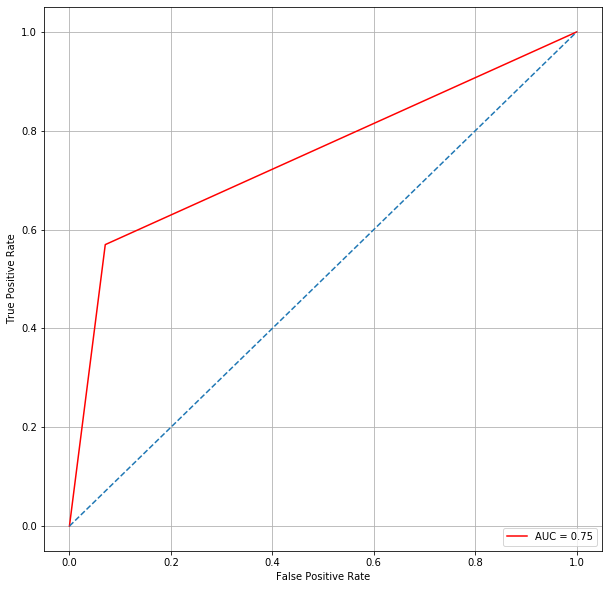

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y,y_pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [29]:
metrics.auc(fpr, tpr)

0.7494849394459415